In [ ]:
# # BGR, BGRA, Ahlpha 채널 (rgba.py)

# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

# # 기본 값 옵션
# img = cv2.imread('0.png')   
# # IMREAD_COLOR 옵션                   
# bgr = cv2.imread('0.png', cv2.IMREAD_COLOR)    
# # IMREAD_UNCHANGED 옵션
# bgra = cv2.imread('0.png', cv2.IMREAD_UNCHANGED) 
# # 각 옵션에 따른 이미지 shape
# print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape) 



# cv2.imshow('bgr', bgr)
# cv2.imshow('bgra', bgra)
# cv2.imshow('alpha', bgra[:,:,3])  # 알파 채널만 표시
# cv2.waitKey(0)
# cv2.destroyAllWindows()

default (700, 1000, 3) color (700, 1000, 3) unchanged (700, 1000, 3)


DisabledFunctionError: ignored

In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# source_image = cv2.imread("6LfDs.png") #Image of cat with text watermark
# text = cv2.imread("gJAAx.png", cv2.IMREAD_UNCHANGED) #Image of text

# correcting_matrix = ((255 -text[:,:,3]) /255) #Matrix of "how much this pixel was darkened by applying text overlay"
# original_image = (source_image / correcting_matrix[:,:,np.newaxis]).astype(np.uint8) 

# cv2.imwrite("original_image.png", original_image)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
source_image = cv2.imread("cattext.png") #Image of cat with text watermark
text = cv2.imread("textwatermark.png", cv2.IMREAD_UNCHANGED) #Image of text

correcting_matrix = ((255 -text[:,:,3]) /255) #Matrix of "how much this pixel was darkened by applying text overlay"
original_image = (source_image / correcting_matrix[:,:,np.newaxis]).astype(np.uint8) 

cv2.imwrite("0.png", original_image)

True

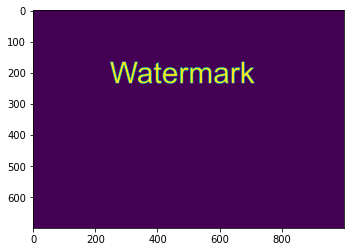

In [ ]:

plt.imshow(test_image)

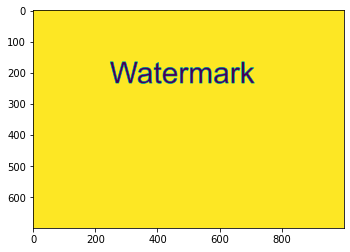

In [ ]:

plt.imshow(correcting_matrix)

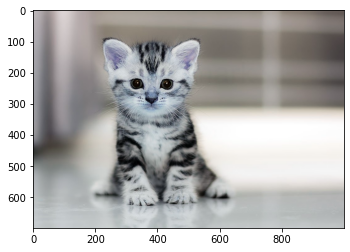

In [ ]:
plt.imshow(original_image)

In [ ]:
img = cv2.imread('ultrasound.png')
mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

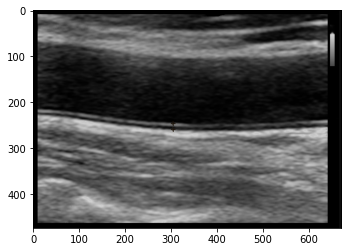

In [ ]:
plt.imshow(img)
plt.imshow(mask)
plt.imshow(dst)

In [ ]:
cv2.imwrite("00001.png", dst)

True

In [ ]:
crosses = mask[235:267,290:320] | mask[233:265,288:318]
mask[235:267,290:320] = crosses
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

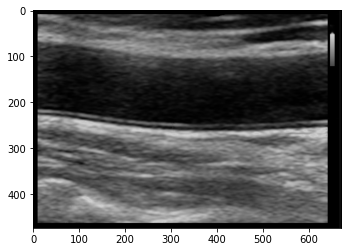

In [ ]:
plt.imshow(dst)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('patient.jpg')
mask = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)[1][:,:,0]
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

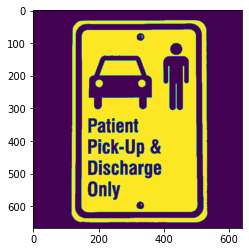

In [11]:
# plt.imshow(img)
plt.imshow(mask)
# # plt.imshow(dst)

In [8]:
crosses = mask[235:267,290:320] | mask[233:265,288:318]
mask[235:267,290:320] = crosses
dst = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

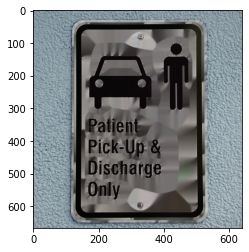

In [9]:
plt.imshow(dst)

In [14]:
pip install easyocr

     |████████████████████████████████| 63.6 MB 38 kB/s 
     |████████████████████████████████| 47.6 MB 58 kB/s 


In [16]:
pip install googletrans

     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 10.8 MB/s 
     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=696f8045fc093b9aa2683078886fae95acd29271910d0a31ecaa00286b424bc8
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


4.1.2


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


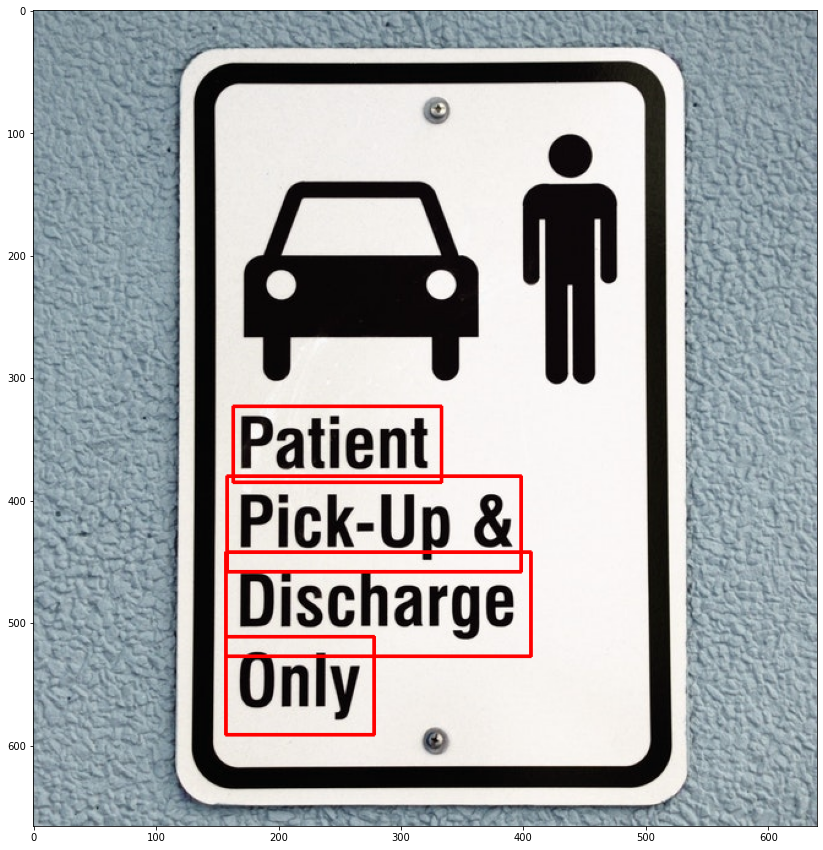

Text_list : ['Patient', 'Pick-Up &', 'Discharge', 'Only']
Tranlated_texts : ['환자', '픽업 &', '퇴원', '오직']


In [18]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import sys
import googletrans
from typing import List
import requests
import pprint

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

print(cv2.__version__)

# 이미지 파일 경로
file_path = r'patient.jpg'
img = cv2.imread(file_path, cv2.IMREAD_COLOR)

CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
CLIENT_SECRET = "gY1PNWHP54"

if img is None:
    print('Image load failed!')
    sys.exit()


# 이미지 출력함수
def display(img):
    # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()


def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()


def easy_ocr_result(img, language='en', draw=True, text=False):
    reader = easyocr.Reader([language])
    results = reader.readtext(img)

    # 바운딩박스 리스트
    bbox_list = []
    # 텍스트 리스트
    text_list = []

    if draw == False: # 원래 이미지만 출력
        display(img)

    elif draw == True and text == False: # 이미지에 바운딩 박스그리기
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)
            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)

        # show the output image
        display(img2)

    elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)

            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            text = cleanup_text(text)
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
            cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

        # show the output image
        display(img2)
    return bbox_list, text_list


def translate_texts(texts: List[str], type='google') -> List[str]:
    global tranlated_texts
    if type == 'google':
        translator = googletrans.Translator()
        tranlated_texts = [
            translator.translate(text=text, src='en', dest='ko').text
            for text in texts
        ]
    elif type == 'naver':
        url = "https://openapi.naver.com/v1/papago/n2mt"
        header = {"X-Naver-Client-Id": CLIENT_ID, "X-Naver-Client-Secret": CLIENT_SECRET}
        tranlated_texts = []
        for text in texts:
            data = {'text': text, 'source': 'en', 'target': 'ko'}
            response = requests.post(url, headers=header, data=data)
            rescode = response.status_code
            if rescode == 200:
                t_data = response.json()
                tranlated_texts.append(t_data['message']['result']['translatedText'])
            else:
                print("Error Code:", rescode)

    return tranlated_texts


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    _, text_list = easy_ocr_result(img)
    print('Text_list :', text_list)
    tranlated_texts: List[str] = translate_texts(texts=text_list, type='naver')
    print(f'Tranlated_texts : {tranlated_texts}')


In [1]:
# import cv2

# clickflag = 0 # 클릭상태 확인 전역변수 초기값 0

# def draw_circle(event, x, y, flags, param): 
#     if event == cv2.EVENT_LBUTTONDOWN : # 마우스 왼쪽버튼을 누르면 
#         cv2.circle(img, (x, y), 10, (255,0,0), -1) # (x,y)마우스좌표 중심점으로 반지름 10, (B,G,R)색상, -1은 내부 모두 채움

# def draw_rec(event, x,y, flags, param):
#     if event == cv2.EVENT_LBUTTONDOWN:
#         cv2.rectangle(img, (x,y), (x+100,y+100), (0,255,0), 3) # (x,y)마우스좌표 중신점으로 100x100 사각형을 만듦

# def free_drawing(event, x,y, flags, param): # 자유롭게 그리기
#     global clickflag # 클릭상태를 확인 (전역 변수를 불러옴)

#     if event == cv2.EVENT_LBUTTONDOWN: # 왼쪽버튼을 누르면 플레그를 1로
#         clickflag = 1

#     if event == cv2.EVENT_LBUTTONUP: # 버튼은 때면 0으로
#         clickflag = 0

#     if clickflag == 1:
#         event = cv2.EVENT_MOUSEMOVE # 플레그가 1일때, 마우스가 움직여도 그림이 그려짐
#         cv2.circle(img, (x, y), 10, (255, 0, 0), -1)
# img = cv2.imread('patient.jpg', cv2.IMREAD_COLOR) # img에 이미지를 불러옴. 
# img = cv2.line(img,(0, 100), (1025, 100), (155,55,55),(30)) # 위쪽에 가로 줄을 그음. 
# font = cv2.FONT_HERSHEY_DUPLEX # 텍스트의 폰트를 지정.

# cv2.putText(img, "WARNNING!! This is DDOS Virus", (20, 90), font, 2,(0,0,155), 2, cv2.LINE_AA) # 텍스트를 입력, 글자, 위치, 폰트, 크기 등

# cv2.namedWindow('image') 
# cv2.setMouseCallback('image', free_drawing) # free_drawing함수 호출 (이곳에서 윈도우에서 실행결정)


# while(1): 
#     cv2.imshow('image', img) 
#     if cv2.waitKey(20) & 0xFF == 0x1B: # 무한 반복중, 키보드 ESC 아스키코드가 들어오면 빠져나감. 
#         break 
# cv2.destroyAllWindows() # 창을 종료



In [ ]:
# convert watermark.png -alpha extract -threshold 0 mask.png

In [ ]:
# #!/opt/local/bin/python3.6

# import numpy as np
# import skimage.io
# import skimage.restoration
# import skimage.exposure

# img = skimage.io.imread('/Users/fred/desktop/kitty.png')
# msk = skimage.io.imread('/Users/fred/desktop/mask.png')
# msk = skimage.exposure.rescale_intensity(msk, in_range='image', out_range=(0,1))
# newimg = skimage.restoration.inpaint_biharmonic(img, msk, multichannel=True)
# skimage.io.imsave('/Users/fred/desktop/kitty_inpaint_biharmonic.png', newimg)

In [ ]:


import numpy as np
import skimage.io
import skimage.restoration
import skimage.exposure

img = skimage.io.imread('/content/cattext.png')
msk = skimage.io.imread('/content/textwatermark.png')
msk = skimage.exposure.rescale_intensity(msk, in_range='image', out_range=(0,1))
newimg = skimage.restoration.inpaint_biharmonic(img, msk, multichannel=True)
skimage.io.imsave('/content/01.png', newimg)

In [ ]:
# convert kitty.png \
# \( watermark.png -alpha extract -threshold 0 -negate \) \
# -alpha off -compose copy_opacity -composite \
# -crop 490x102+235+150 +repage tmp1.png

In [ ]:
convert cattext.png \
\( textwatermark.png -alpha extract -threshold 0 -negate \) \
-alpha off -compose copy_opacity -composite \
-crop 490x102+235+150 +repage tmp1.png

In [ ]:
# convert tmp1.png \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# \( +clone -resize 90.9091% \) \
# -layers RemoveDups \
# -filter Gaussian -resize 490x102! \
# -background None \
# -compose DstOver -layers merge \
# -alpha opaque \
# tmp2.png

In [ ]:
# convert kitty.png tmp2.png -geometry +235+150 -compose over -composite kitty2.png

In [ ]:
# Line1 - read the kitty image
# Line2 - copy it and make it all white rgb(255,255,255), save it into memory and delete the copy image from the image sequence
# Line3 - read the watermark image and extract the alpha channel. Then subtract it from white
# Line4 - divide the result of line 3 by the white image
# Line5 - divide the kitty image by the result of line 4
# Line6 - save the result to disk

# convert kitty.png \
# \( -clone 0 -fill white -colorize 100 -write mpr:white +delete \) \
# \( watermark.png -alpha extract mpr:white -compose minus -composite \
# mpr:white +swap -compose divide -composite \) \
# +swap -compose divide -composite \
# kitty_restored.png